In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_openml
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [0]:
mnist = fetch_openml(name='mnist_784', version=1)

In [17]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [15]:
mnist['data'].shape

(70000, 784)

In [0]:
X_train = mnist["data"][:6000]
y_train = mnist["target"][:6000]
X_test = mnist["data"][6000:]
y_test = mnist["target"][6000:]

The number is 9


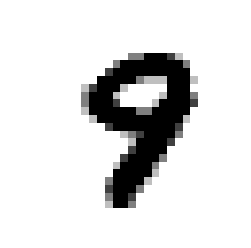

In [37]:
plt.figure(111)
plt.imshow(X_train[-1].reshape(28, 28), cmap=plt.cm.binary)
plt.axis('off')

print(f"The number is {y_train[-1]}")

In [0]:
model_name = ["Decision Tree Classifier", "KNeighbors Classifier", "SV Classifer"]
models = [DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          SVC(gamma='scale', random_state=42)]

In [0]:
def compare_models(models, model_name, X, y):
  for i, model in enumerate(models):
    print(f"{model_name[i]}:")
    y_pred = cross_val_predict(model, X, y, cv=3)
    print(f"Precision Score: {precision_score(y, y_pred, average='weighted', )}")
    print(f"Recall Score: {recall_score(y, y_pred, average='weighted')}")
    print(f"F1 Score: {f1_score(y, y_pred, average='weighted')}")
    print(f"Cross val score: {cross_val_score(model, X, y, cv=3, scoring='accuracy')}")

In [66]:
compare_models(models, model_name, X_train, y_train)

Decision Tree Classifier:
Precision Score: 0.7636964499481936
Recall Score: 0.7641666666666667
F1 Score: 0.7637437563513383
Cross val score: [0.75798403 0.75912044 0.7754386 ]
KNeighbors Classifier:
Precision Score: 0.9292117481061224
Recall Score: 0.927
F1 Score: 0.9267902964068522
Cross val score: [0.92115768 0.93403298 0.92581454]
SV Classifer:
Precision Score: 0.9502532033130785
Recall Score: 0.9501666666666667
F1 Score: 0.9500926442976152
Cross val score: [0.94211577 0.96101949 0.94736842]


In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float))

In [69]:
compare_models(models, model_name, X_train_scaled, y_train)

Decision Tree Classifier:
Precision Score: 0.7627615760894126
Recall Score: 0.7633333333333333
F1 Score: 0.7628696700361106
Cross val score: [0.75748503 0.75962019 0.77293233]
KNeighbors Classifier:
Precision Score: 0.8870074869873169
Recall Score: 0.8856666666666667
F1 Score: 0.8849687664376
Cross val score: [0.88073852 0.89955022 0.87669173]
SV Classifer:
Precision Score: 0.9197754913985429
Recall Score: 0.9171666666666667
F1 Score: 0.9177392125273527
Cross val score: [0.90419162 0.93653173 0.91077694]


#### KNeighbors Classifier